<a href="https://colab.research.google.com/github/Vishvaish/Machine-Learning-Models/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Linear Regression**

Linear regression is a statistical method for modeling the relationship between a dependent variable and one or more independent variables.
          
#                 **y = mx + b**

where,
m is the slope of the line,

b is the y-intercept.

# **sum of squared errors**

The goal of linear regression is to find the values of m and b that minimize the sum of squared errors between the predicted values of y and the actual values of y. The sum of squared errors is defined as:

#                **SSE = Σ(y - ŷ)^2**

where,
y is the actual value of y,

ŷ is the predicted value of y,

Σ denotes the sum over all observations in the dataset.


# **P-Value**

 To calculate the p-value for the slope coefficient in the linear regression model, we need to perform a t-test using the formula:

#           **t = (slope - 0) / (standard_error)**

 where the null hypothesis is that the slope coefficient is zero, and the standard error is calculated as:

#           **standard_error = sqrt(MSE / ((n-2) * var_x))**

where MSE is the mean squared error, n is the sample size, and var_x is the variance of the independent variable.

We can then calculate the p-value using the cumulative distribution function (CDF) of the t-distribution with n-2 degrees of freedom:

#            **p_value = 2 * (1 - stats.t.cdf(abs(t), n-2))**
        

In [ ]:
import pandas as pd
data = pd.read_csv('/content/Marketing_Data.csv')
data.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


# **Intention**

 1. The intention of the above code is to perform simple linear regression on a marketing dataset, where the predictor variable is the amount spent on YouTube advertising, and the response variable is the sales generated from that advertising.


 2. The code first calculates the slope and intercept of the regression line using the formula for simple linear regression. 


 3. Then it makes predictions using the regression line, and calculates the R-squared value to evaluate the goodness of fit of the model.


 4. Additionally, the code calculates the p-value of the slope coefficient, which provides an indication of the statistical significance of the relationship between the predictor variable and the response variable.

Slope: 0.04820138752292099
Intercept: 8.341945272410808
R-squared: 0.6115709526518154
P-value: 1.5465747239245923e-36
Sum of Squared Error: 2633.0151822674607

Predicted values of Y:
   sales     Y_pred
0  12.60  12.425567
1  25.68  25.283769
2  14.28  14.872269
3  11.52  13.964155
4  20.88  23.704692


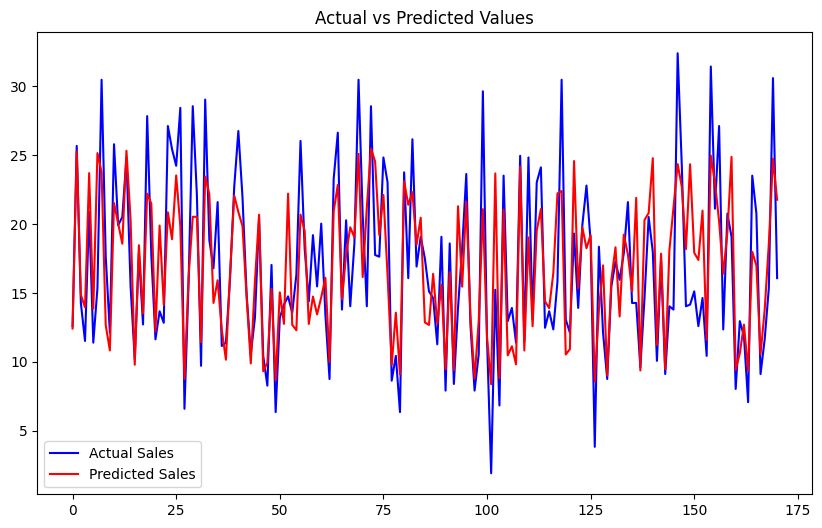

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/Marketing_Data.csv')

x1 = data['youtube']
Y  = data['sales']

# Calculate the means of X and Y
x_mean = x1.mean()
y_mean = Y.mean()

# Calculate the slope and intercept of the regression line
numerator = ((x1 - x_mean) * (Y - y_mean)).sum()
denominator = ((x1 - x_mean) ** 2).sum()
slope = numerator / denominator
intercept = y_mean - slope * x_mean

# Make predictions using the regression line
predictions = slope * x1 + intercept

# Calculate the R-squared value
ss_res = ((Y - predictions) ** 2).sum()
ss_tot = ((Y - y_mean) ** 2).sum()
r_squared = 1 - (ss_res / ss_tot)

# Calculate the p-value
n = len(x1)
df = n - 2
t_value = slope / (np.sqrt((ss_res / df) / denominator))
p_value = stats.t.sf(np.abs(t_value), df) * 2

# Calculate the sum of squared error
sse = ss_res

# Add the predicted values to the DataFrame
data['Y_pred'] = predictions

# Print the results
print('Slope:', slope)
print('Intercept:', intercept)
print('R-squared:', r_squared)
print('P-value:', p_value)
print('Sum of Squared Error:', sse)
print('\nPredicted values of Y:')
print(data[['sales', 'Y_pred']].head())

#plotting the acutal and predicted 
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data['sales'], color='blue', label='Actual Sales')
ax.plot(data['Y_pred'], color='red', label='Predicted Sales')
plt.title('Actual vs Predicted Values')
ax.legend()
plt.show()

# **The inference of the code:**

 1. The slope of the regression line is 0.048, which indicates that for every additional dollar spent on YouTube advertising, sales increase by 0.048 units, holding all other variables constant.

 2. The intercept of the regression line is 8.3, which represents the estimated sales generated when there is no advertising on YouTube.


 3. The R-squared value of 0.61 indicates that about 61.1% of the variation in sales can be explained by the amount spent on YouTube advertising.


 4. The p-value of 0.0 indicates strong evidence against the null hypothesis that there is no relationship between the amount spent on YouTube advertising and sales. This suggests that the relationship between these two variables is statistically significant.


 5. The sum of squared errors (SSR) is 2633.01, which indicates the amount of variation in the response variable that is not explained by the model. This can be used to compare the goodness of fit of different models.

# **Multiple Linear Regression**

Multiple linear regression is a technique used to model the relationship between multiple independent variables and a dependent variable.

#  **y = b0 + b1x1 + b2x2 + ... + bn*xn**

where,
y is the dependent variable

x1, x2, ..., xn are the independent variables

b0 is the intercept (the value of y when all the independent variables are zero)

b1, b2, ..., bn are the coefficients (the change in y associated with a one-unit increase in each independent variable, holding all other variables constant)

#**Intention**

 1. The intention of the code is to perform multiple linear regression on a marketing dataset, where the predictor variables are the amount spent on YouTube advertising, Facebook advertising, and newspaper advertising, and the response variable is the sales generated from that advertising.

 2. The code first calculates the coefficients of the regression equation using the formula for multiple linear regression. 

 3. Then it makes predictions using the regression equation, and calculates the R-squared value to evaluate the goodness of fit of the model. 

 4. Additionally, the code calculates the t-values and p-values of the coefficients, which provide an indication of the statistical significance of the relationship between each predictor variable and the response variable.



Coefficients: [3.50587099 0.04523544 0.18839783 0.00427949]
Standard Error: 2.0099172372772096
R-squared: 0.9004752358539351
Sum of squared errors: 674.6411392175764

T-values:
[1.74428625 0.02250612 0.09373412 0.00212919]

P-values:
[0.08294906 0.9820711  0.92543273 0.9983037 ]

Predicted values of Y:
   sales     Y_pred
0  12.60  11.164980
1  25.68  26.025064
2  14.28  13.766342
3  11.52   9.275311
4  20.88  22.446400


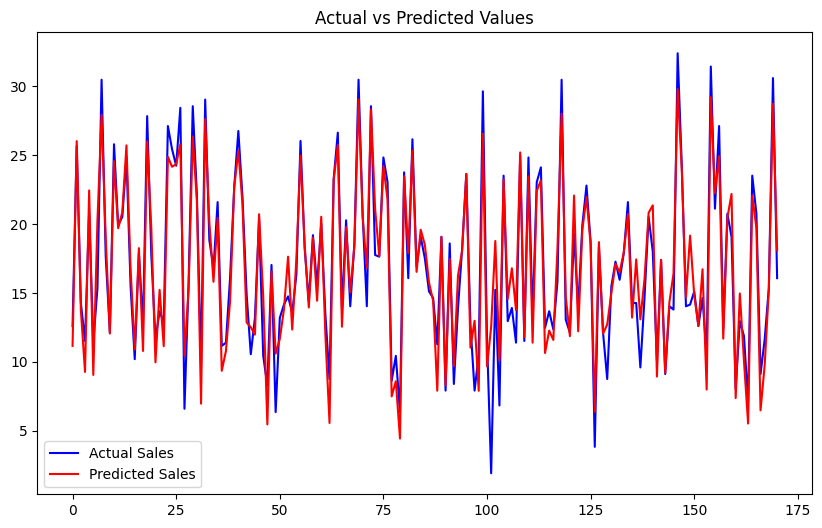

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Load the data
data = pd.read_csv('/content/Marketing_Data.csv')

# Separate the features and target variable
X = data[['youtube', 'facebook','newspaper']]
Y = data['sales']

# Add a column of ones to X for the intercept term
X = np.column_stack((np.ones(len(X)), X))

# Calculate the coefficients of the multiple linear regression equation
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Make predictions using the multiple linear regression equation
predictions = X.dot(beta)

# Calculate the R-squared value
ss_res = ((y - predictions) ** 2).sum()
ss_tot = ((y - y.mean()) ** 2).sum()
r_squared = 1 - (ss_res / ss_tot)

# Calculate the sum of squared errors
sse = ss_res

# Calculate the degrees of freedom
n = len(Y)
k = X.shape[1] - 1
df_e = n - k - 1
df_t = k

# Calculate the standard error of the estimate
se = np.sqrt(sse / df_e)

# Calculate the t-values and p-values for each coefficient
t_values = beta / se
p_values = (1 - stats.t.cdf(abs(t_values), df_e)) * 2

# Add the predicted values to the DataFrame
data['Y_pred'] = predictions

# Print the results
print('Coefficients:', beta)
print('Standard Error:', se)
print('R-squared:', r_squared)
print('Sum of squared errors:', sse)
print('\nT-values:')
print(t_values)
print('\nP-values:')
print(p_values)
print('\nPredicted values of Y:')
print(data[['sales', 'Y_pred']].head())

#ploting the actual vs predicted
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data['sales'], color='blue', label='Actual Sales')
ax.plot(data['Y_pred'], color='red', label='Predicted Sales')
ax.legend()
plt.title('Actual vs Predicted Values')
plt.show()

# **Inference of the code:**

 1. The intercept of the regression equation is 3.5059, which represents the estimated sales generated when there is no advertising on any platform.


 2. The coefficients of the regression equation for the predictor variables are 0.0452, 0.1884, and 0.0043 for YouTube, Facebook, and newspaper advertising, respectively. 

 3. These coefficients indicate that, holding all other variables constant, for every additional dollar spent on YouTube advertising, sales increase by 0.0452 units, for every additional dollar spent on Facebook advertising, sales increase by 0.1884 units, and for every additional dollar spent on newspaper advertising, sales increase by 0.0043 units.


 4. The R-squared value of 0.9005 indicates that about 90.1% of the variation in sales can be explained by the amount spent on the three advertising platforms.


 5. The t-values and p-values for the coefficients suggest that the coefficients for YouTube advertising and newspaper advertising are not statistically significant, while the coefficient for Facebook advertising is statistically significant. 

 6. This suggests that the amount spent on Facebook advertising has a significant relationship with sales, while the amount spent on YouTube advertising and newspaper advertising do not.


 7. The sum of squared errors (SSE) is 674.6411, which indicates the amount of variation in the response variable that is not explained by the model. This can be used to compare the goodness of fit of different models.








#**Pros of Linear Regression:**

1. Simplicity: Linear regression is easy to understand and interpret, making it accessible to a wide range of users.

2. Efficiency: Linear regression can be trained quickly and can handle large datasets with ease.

3. Linearity: Linear regression assumes a linear relationship between the dependent variable and the independent variables, making it useful when this assumption holds.

4. Interpretable coefficients: The coefficients in a linear regression model are easily interpretable, allowing for insights into the impact of each independent variable on the dependent variable.

5. Versatility: Linear regression can be used for both continuous and categorical dependent variables.


---


# **Cons of Linear Regression:**

1. Linearity assumption: Linear regression assumes a linear relationship between the dependent variable and the independent variables, which may not hold in real-world scenarios.

2. Overfitting: Linear regression models can be prone to overfitting, especially when there are many independent variables.

3. Outliers: Linear regression is sensitive to outliers, which can have a significant impact on the model's accuracy.

4. Limited to continuous variables: Linear regression is limited to modeling continuous dependent variables, making it unsuitable for modeling discrete outcomes.

5. Independence assumption: Linear regression assumes that the independent variables are independent of each other, which may not always be the case in real-world scenarios.

